In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

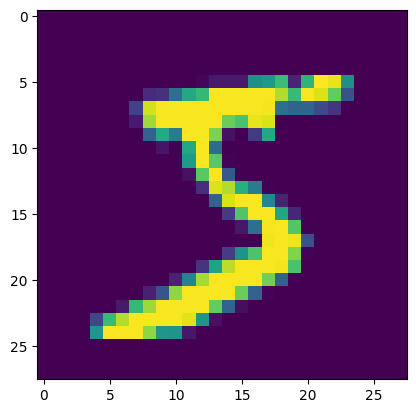

In [5]:
plt.imshow(X_train[0]);

#### scale the Data

In [6]:
X_train = X_train/255

In [7]:
X_test = X_test/255

#### Create a stacked autoencode

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [11]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [12]:
autoencoder = Sequential([encoder,decoder])

In [13]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer=SGD(learning_rate=1.5),
                   metrics=['accuracy'])

In [14]:
autoencoder.fit(X_train, X_train,epochs=5, validation_data=[X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2524 - accuracy: 0.0839 - val_loss: 0.2108 - val_accuracy: 0.1245
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1857 - accuracy: 0.1618 - val_loss: 0.1678 - val_accuracy: 0.1883
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1583 - accuracy: 0.1986 - val_loss: 0.1499 - val_accuracy: 0.2102
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1473 - accuracy: 0.2159 - val_loss: 0.1439 - val_accuracy: 0.2202
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1416 - accuracy: 0.2243 - val_loss: 0.1367 - val_accuracy: 0.2300


In [16]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 203ms/step


Original image


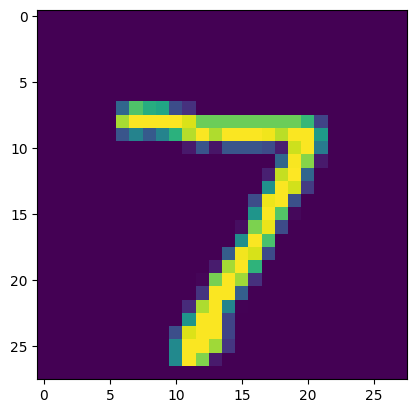

Attempted Reconstruction(after autoencoder)


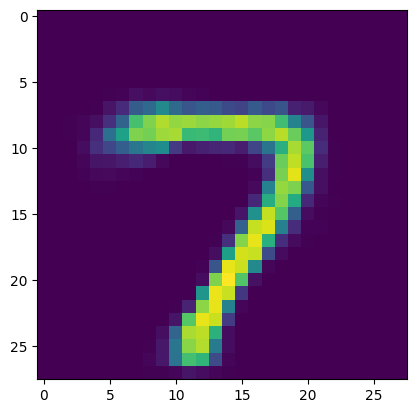

In [19]:
n = 0
print("Original image")
plt.imshow(X_test[n])
plt.show()
print("Attempted Reconstruction(after autoencoder)")
plt.imshow(passed_images[n]);

#### denoising images

In [25]:
tf.random.set_seed(101)
np.random.seed(101)
#add the noise
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
#add noise
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [26]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [27]:
noise_remover = Sequential([encoder,decoder])

In [28]:
noise_remover.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [29]:
noise_remover.fit(X_train, X_train,epochs=8, validation_data=[X_test,X_test])

Epoch 1/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1698 - accuracy: 0.1814 - val_loss: 0.1316 - val_accuracy: 0.2249
Epoch 2/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1302 - accuracy: 0.2307 - val_loss: 0.1218 - val_accuracy: 0.2415
Epoch 3/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1218 - accuracy: 0.2434 - val_loss: 0.1160 - val_accuracy: 0.2476
Epoch 4/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1167 - accuracy: 0.2524 - val_loss: 0.1117 - val_accuracy: 0.2596
Epoch 5/8
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1136 - accuracy: 0.2587 - val_loss: 0.1086 - val_accuracy: 0.2622
Epoch 6/8
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1112 - accuracy: 0.2640 - val_loss: 0.1063 - val_accuracy: 0.2705
Epoch 7/8
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1089 - accuracy: 0.2680 - val_loss: 0.1050 - val_ac

#### generate some sample data with noise

In [38]:
sample = GaussianNoise(0.2)

In [31]:
noisey = sample(X_test[:10], training=True)

ORIGINAL


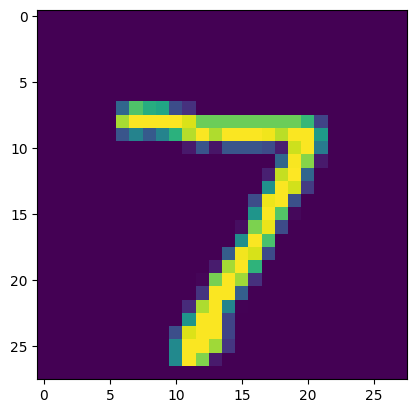

NOISEY


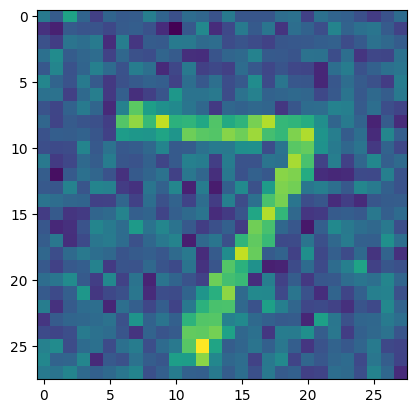

In [34]:
n = 0
print("ORIGINAL")
plt.imshow(X_test[n])
plt.show()
print("NOISEY")
plt.imshow(noisey[n]);

In [40]:
ten_noisey_images = sample(X_test[:10], training = True)

In [41]:
denoised = noise_remover(ten_noisey_images)

ORIGINAL IMAGE


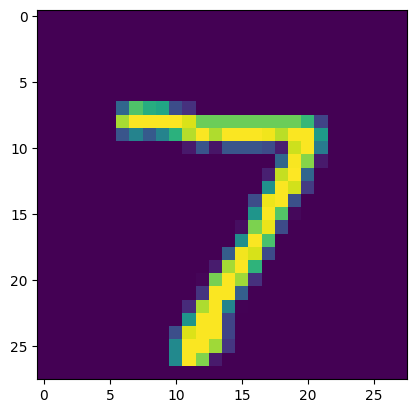

NOISE ADDED IMAGE


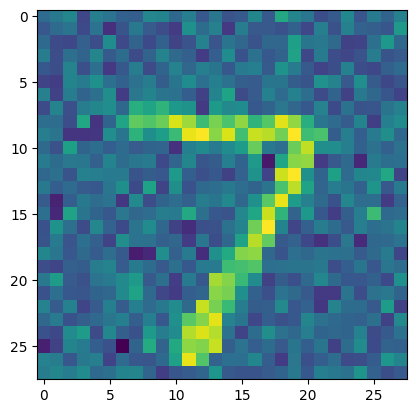

AFTER NOISE REMOVAL FROM AUTOENCODER


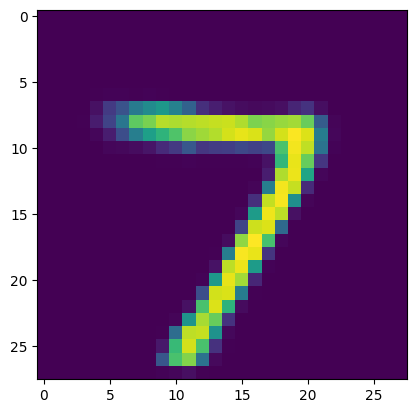

In [43]:
n = 0
print("ORIGINAL IMAGE")
plt.imshow(X_test[n])
plt.show()
print("NOISE ADDED IMAGE")
plt.imshow(ten_noisey_images[n])
plt.show()
print("AFTER NOISE REMOVAL FROM AUTOENCODER")
plt.imshow(denoised[n]);